In [1]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('..')))

In [2]:
import numpy as np 
import scipy.fft
from operators.setup_FOM import SimulationSetupFOM
from operators.FOM import psi_ln_aw, charge_density, D_matrix_inv_full, total_mass, total_momentum, total_energy_k, fft_
from matplotlib import animation
from IPython.display import HTML

In [3]:
%matplotlib inline
import matplotlib
font = {'family' : 'serif',
        'size'   : 14}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

plt.rcParams['figure.figsize'] = (5,3)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100
plt.rcParams["animation.html"] = "jshtml"  # for matplotlib 2.1 and above, uses JavaScript
#plt.rcParams["animation.html"] = "html5" # for matplotlib 2.0 and below, converts to x264 using ffmpeg video codec

# Nonlinear (Strong) Landau damping 

In [4]:
# setup parameters
sol_midpoint_t = np.linspace(0, 100, 1001)
Nx = 100
Nv = 300

In [5]:
# read in reference electric field
E_ref = np.load("data/reference_alex_koshkarov/Opal_16k_16k_E/E_coeff_reference.npy").T

In [6]:
np.shape(E_ref)

(16384, 1001)

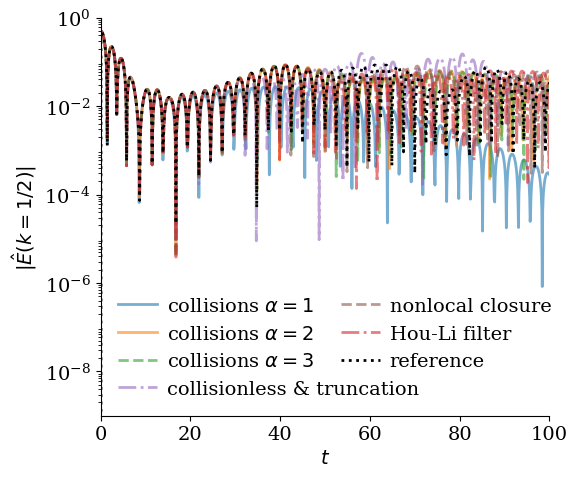

In [7]:
# plot the electric field dampin rate
fig, ax = plt.subplots(figsize=(6, 5 ))

# hyper 1 (LB) tab:blue -
E_LB = np.load("data/nonlinear_landau_300/E_coeff_300_closure_truncation_collisions_hyper_1_nu_0.55.npy")
ax.plot(sol_midpoint_t, np.abs(E_LB[Nx+1]), "-", c="tab:blue", alpha=0.6, linewidth=2, label=r"collisions $\alpha=1$") 

# hyper 2 (Camporeale) tab:orange -
E_hyper2 = np.load("data/nonlinear_landau_300/E_coeff_300_closure_truncation_collisions_hyper_2_nu_1.312.npy")
ax.plot(sol_midpoint_t, np.abs(E_hyper2[Nx+1]), "-", c="tab:orange", alpha=0.6, linewidth=2, label=r"collisions $\alpha=2$") 

# hyper 3 tab:green -
E_hyper3 = np.load("data/nonlinear_landau_300/E_coeff_300_closure_truncation_collisions_hyper_3_nu_2.013.npy")
ax.plot(sol_midpoint_t, np.abs(E_hyper3[Nx+1]), "--", c="tab:green", alpha=0.6, linewidth=2, label=r"collisions $\alpha=3$") 

# collisionless closure by truncation
E_collisionless = np.load("data/nonlinear_landau_300/E_coeff_300_closure_truncation_collisions_collisionless_None_nu_0.npy")
ax.plot(sol_midpoint_t, np.abs(E_collisionless[Nx+1]), "-.", c="tab:purple", alpha=0.6, linewidth=2, label="collisionless & truncation") 

# nonlocal closure tab: brown --
E_hp = np.load("data/nonlinear_landau_300/E_coeff_300_closure_hammett_perkins_collisions_collisionless_None_nu_0.npy")
ax.plot(sol_midpoint_t, np.abs(E_hp[Nx+1]), "--", c="tab:brown", alpha=0.6, linewidth=2, label=r"nonlocal closure") 

# hou li filter
E_filter = np.load("data/nonlinear_landau_300/E_coeff_300_closure_truncation_collisions_hou_li_None_nu_12.228.npy")
ax.plot(sol_midpoint_t, np.abs(E_filter[Nx+1]), "-.", c="tab:red", alpha=0.6, linewidth=2, label="Hou-Li filter") 

# reference
ax.plot(sol_midpoint_t, np.abs(E_ref[1]), ":", c="black", linewidth=2, label=r"reference") 



ax.set_yscale("log")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel("$|\hat{E}(k=1/2)|$")
ax.set_xlim(0, 100)
ax.set_yticks([1, 1e-2, 1e-4, 1e-6, 1e-8])
ax.set_xlabel("$ t$")
ax.set_ylim(1e-9, 1)
legend = ax.legend(ncols=2, fancybox=False, shadow=False, fontsize=14, loc="lower left", columnspacing=-4., handletextpad=0.5)
legend.get_frame().set_alpha(0)
plt.tight_layout()
plt.savefig("figs/nonlinear_landau/manuscript/nonlinear_landau_electric_field_damping_k_0.5.png", dpi=200, bbox_inches='tight')

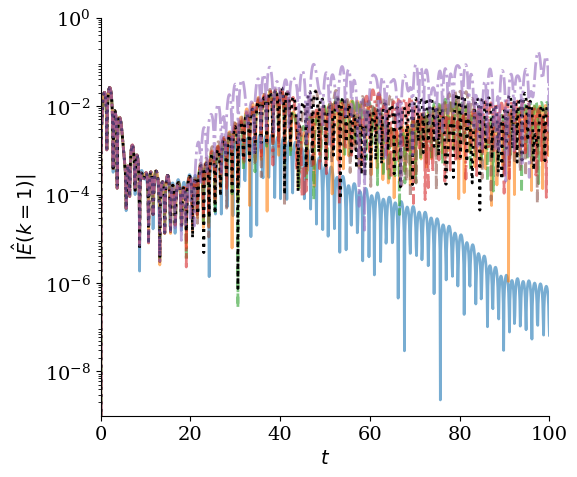

In [8]:
# plot the electric field damping rate
fig, ax = plt.subplots(figsize=(6, 5))

# hyper 1 (LB) tab:blue -
E_LB = np.load("data/nonlinear_landau_300/E_coeff_300_closure_truncation_collisions_hyper_1_nu_0.55.npy")
ax.plot(sol_midpoint_t, np.abs(E_LB[Nx+2]), "-", c="tab:blue", alpha=0.6, linewidth=2, label=r"collisions $\alpha=1$") 

# hyper 2 (Camporeale) tab:orange -
E_hyper2 = np.load("data/nonlinear_landau_300/E_coeff_300_closure_truncation_collisions_hyper_2_nu_1.312.npy")
ax.plot(sol_midpoint_t, np.abs(E_hyper2[Nx+2]), "-", c="tab:orange", alpha=0.6, linewidth=2, label=r"collisions $\alpha=2$") 

# hyper 3 tab:green -
E_hyper3 = np.load("data/nonlinear_landau_300/E_coeff_300_closure_truncation_collisions_hyper_3_nu_2.013.npy")
ax.plot(sol_midpoint_t, np.abs(E_hyper3[Nx+2]), "--", c="tab:green", alpha=0.6, linewidth=2, label=r"collisions $\alpha=3$") 


# nonlocal closure tab: brown --
E_hp = np.load("data/nonlinear_landau_300/E_coeff_300_closure_hammett_perkins_collisions_collisionless_None_nu_0.npy")
ax.plot(sol_midpoint_t, np.abs(E_hp[Nx+2]), "--", c="tab:brown", alpha=0.6, linewidth=2, label=r"nonlocal closure $N_{m}=1$") 


# hou li filter
E_filter = np.load("data/nonlinear_landau_300/E_coeff_300_closure_truncation_collisions_hou_li_None_nu_12.228.npy")
ax.plot(sol_midpoint_t, np.abs(E_filter[Nx+2]), "-.", c="tab:red", alpha=0.6, linewidth=2, label="Hou-Li filter") 

# reference
ax.plot(sol_midpoint_t, np.abs(E_ref[2]), ":", c="black", linewidth=2, label=r"reference solution") 

# collisionless closure by truncation
E_collisionless = np.load("data/nonlinear_landau_300/E_coeff_300_closure_truncation_collisions_collisionless_None_nu_0.npy")
ax.plot(sol_midpoint_t, np.abs(E_collisionless[Nx+2]), "-.", c="tab:purple", alpha=0.6, linewidth=2, label="collisionless w/ closure by truncation") 


ax.set_yscale("log")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel("$|\hat{E}(k=1)|$")
ax.set_xlim(0, 100)
ax.set_yticks([1, 1e-2, 1e-4, 1e-6, 1e-8])
ax.set_xlabel("$ t$")
ax.set_ylim(1e-9, 1)
#legend = ax.legend(ncols=2, fancybox=False, shadow=False, fontsize=12, loc="upper center")
#legend.get_frame().set_alpha(0)
#ax.set_xticks([0,5, 10, 15, 20])
plt.tight_layout()
plt.savefig("figs/nonlinear_landau/manuscript/nonlinear_landau_electric_field_damping_k_1.png", dpi=200, bbox_inches='tight')

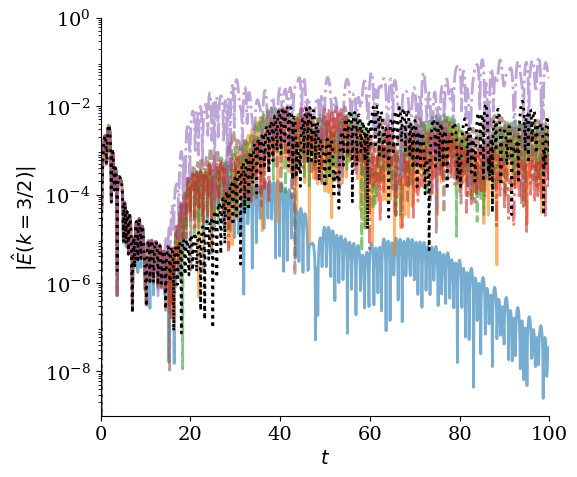

In [11]:
# plot the electric field damping rate
fig, ax = plt.subplots(figsize=(6, 5))

# hyper 1 (LB) tab:blue -
E_LB = np.load("data/nonlinear_landau_300/E_coeff_300_closure_truncation_collisions_hyper_1_nu_0.55.npy")
ax.plot(sol_midpoint_t, np.abs(E_LB[Nx+3]), "-", c="tab:blue", alpha=0.6, linewidth=2, label=r"collisions $\alpha=1$") 

# hyper 2 (Camporeale) tab:orange -
E_hyper2 = np.load("data/nonlinear_landau_300/E_coeff_300_closure_truncation_collisions_hyper_2_nu_1.312.npy")
ax.plot(sol_midpoint_t, np.abs(E_hyper2[Nx+3]), "-", c="tab:orange", alpha=0.6, linewidth=2, label=r"collisions $\alpha=2$") 

# hyper 3 tab:green -
E_hyper3 = np.load("data/nonlinear_landau_300/E_coeff_300_closure_truncation_collisions_hyper_3_nu_2.013.npy")
ax.plot(sol_midpoint_t, np.abs(E_hyper3[Nx+3]), "--", c="tab:green", alpha=0.6, linewidth=2, label=r"collisions $\alpha=3$") 


# nonlocal closure tab: brown --
E_hp = np.load("data/nonlinear_landau_300/E_coeff_300_closure_hammett_perkins_collisions_collisionless_None_nu_0.npy")
ax.plot(sol_midpoint_t, np.abs(E_hp[Nx+3]), "--", c="tab:brown", alpha=0.6, linewidth=2, label=r"nonlocal closure $N_{m}=1$") 


# hou li filter
E_filter = np.load("data/nonlinear_landau_300/E_coeff_300_closure_truncation_collisions_hou_li_None_nu_12.228.npy")
ax.plot(sol_midpoint_t, np.abs(E_filter[Nx+3]), "-.", c="tab:red", alpha=0.6, linewidth=2, label="Hou-Li filter") 

# collisionless closure by truncation
E_collisionless = np.load("data/nonlinear_landau_300/E_coeff_300_closure_truncation_collisions_collisionless_None_nu_0.npy")
ax.plot(sol_midpoint_t, np.abs(E_collisionless[Nx+3]), "-.", c="tab:purple", alpha=0.6, linewidth=2, label="collisionless w/ closure by truncation") 

# reference
ax.plot(sol_midpoint_t, np.abs(E_ref[3]), ":", c="black",linewidth=2, label=r"reference solution") 


ax.set_ylim(1e-9, 1)
ax.set_yscale("log")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_yticks([1, 1e-2, 1e-4, 1e-6, 1e-8])
ax.set_ylabel("$|\hat{E}(k=3/2)|$")
ax.set_xlim(0, 100)
ax.set_xlabel("$ t$")
plt.tight_layout()
plt.savefig("figs/nonlinear_landau/manuscript/nonlinear_landau_electric_field_damping_k_1.5.png", dpi=200, bbox_inches='tight')